# EDA for Goodreads Book Dataset
Exploring the data found in the goodreads dataset. The goal is to display different visualizations of the data in order to unlock insights or patterns that might be hidden within the large dataset.

In [1]:
# Import modules and libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Assigning dataframe variable
df = pd.read_csv('Clean_data\clean_books.csv').drop(columns = 'Unnamed: 0')

In [3]:
# Check head of clean data
df.head()

,bookID,title,primary_a,secondary_a,average_rating,isbn,isbn13,language_code,# num_pages,ratings_count,text_reviews_count
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling,Mary GrandPré,4.56,0439785960,9780439785969,eng,652,1944099,26249
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling,Mary GrandPré,4.49,0439358078,9780439358071,eng,870,1996446,27613
2,3,Harry Potter and the Sorcerer's Stone (Harry P...,J.K. Rowling,Mary GrandPré,4.47,0439554934,9780439554930,eng,320,5629932,70390
3,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,NaN,4.41,0439554896,9780439554893,eng,352,6267,272
4,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling,Mary GrandPré,4.55,043965548X,9780439655484,eng,435,2149872,33964


## 1. Exploring the different titles in order to see which repeat themeselves
A cursory glance through the CSV file revealed a few repeating titles, so it is important to see which titles repeat the most.

In [4]:
# Determine how many unique book titles there are and compare to the number of entries
unique_titles = list(df.title.unique())
print(f'The number of unique titles is {len(unique_titles)}.')
print(f'The number of entries in the titles column of the dataframe is {len(df.title)}.')
print(f'This means that there are {len(df.title) - len(unique_titles)} book titles that repeat themselves in this list.')

The number of unique titles is 12422.
The number of entries in the titles column of the dataframe is 13714.
This means that there are 1292 book titles that repeat themselves in this list.


In [5]:
# Create a counter for all the titles to see which ones are repeating and how many times.
title_occurances = {}
for item in df['title']:
    if item not in title_occurances:
        title_occurances[item] = 1
    else:
        title_occurances[item] += 1

# Checking results
sorted(title_occurances.items(), key = lambda book: book[1], reverse=True)[:20]

[('One Hundred Years of Solitude', 11),
 ("'Salem's Lot", 11),
 ('The Iliad', 10),
 ('The Brothers Karamazov', 10),
 ('The Lord of the Rings (The Lord of the Rings  #1-3)', 9),
 ('Collected Stories', 9),
 ("A Midsummer Night's Dream", 9),
 ('A Tale of Two Cities', 9),
 ("Gulliver's Travels", 9),
 ('Anna Karenina', 8),
 ('The Odyssey', 8),
 ('Robinson Crusoe', 8),
 ('Romeo and Juliet', 8),
 ('Lord of the Flies', 7),
 ('Pride and Prejudice', 7),
 ('Fahrenheit 451', 7),
 ('Heart of Darkness', 7),
 ('The Picture of Dorian Gray', 7),
 ('The Scarlet Letter', 7),
 ('Treasure Island', 6)]

In [6]:
# Graphing 4 or more occurances of a particular title.
four_or_more = {k:v for k,v in sorted(title_occurances.items(), key= lambda item: item[1], reverse=True) if v>=4}

# Number of books in four_or_more dictionary
len(four_or_more)

119

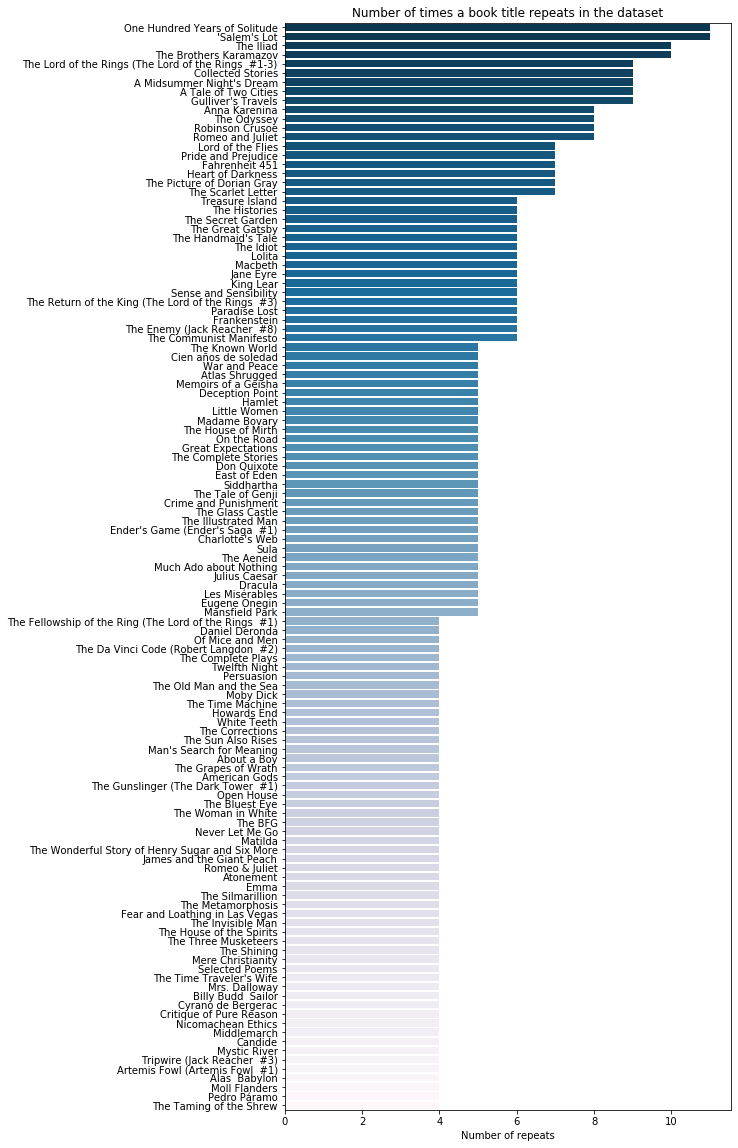

In [7]:
# Creating x and y coordinates
horizontal_x = list(four_or_more.values())
horizontal_y = list(four_or_more.keys())

# Plot graph
fig_dims= (8,20)
fig, ax = plt.subplots(figsize=fig_dims)

sns.barplot(x=horizontal_x, y=horizontal_y, ax=ax, palette="PuBu_r")
plt.xlabel('Number of repeats')
plt.title("Number of times a book title repeats in the dataset")
plt.show()

Many of the books here are quite popular or may have been written in a different langauge beforehand. From the data wrangling step, it was observed that there are sometimes secondary authors who translate works and are given the credit in the author column. Many of the books here might repeat because they are either written in another language or have been translated a few times and have different translators. 

## 2. What Does the Distribution of All the Average Ratings Look Like?

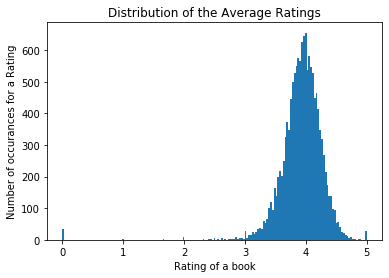

In [8]:
# Look at the spread of avergae ratings
plt.hist(df.average_rating, bins='auto')
plt.title('Distribution of the Average Ratings')
plt.xlabel('Rating of a book')
plt.ylabel('Number of occurances for a Rating')
plt.show()

This appears to be a normal distribution of the average ratings centered near a value of 4. This distribution is explored more in the statistical analysis notebook.

## 3. How Many Different Languages are in the Dataset?

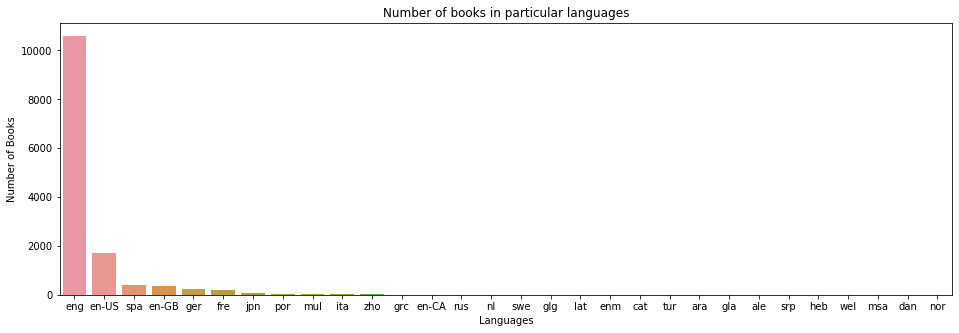

In [9]:
# Distribution of translations
language_count = df.language_code.value_counts()

# Ploting distributions of languages
lang_fig_dim = (16,5)
fig, ax = plt.subplots(figsize=lang_fig_dim)
sns.barplot(language_count.index, list(language_count), ax=ax)
plt.xlabel('Languages')
plt.ylabel('Number of Books')
plt.title('Number of books in particular languages')
plt.show()

It seems that the majority of the languages for these books are in english, which makes the recommendation system clearly more targeted for a english reading demographic.

## 4. What is the Relationship between Number of Pages and the Rating of the Book?

In [10]:
# Defining jointplot function
def joint_plot(x, y, xlabel, ylabel):
    a = sns.jointplot(x=x, y=y)
    a.set_axis_labels(xlabel, ylabel)
    return a

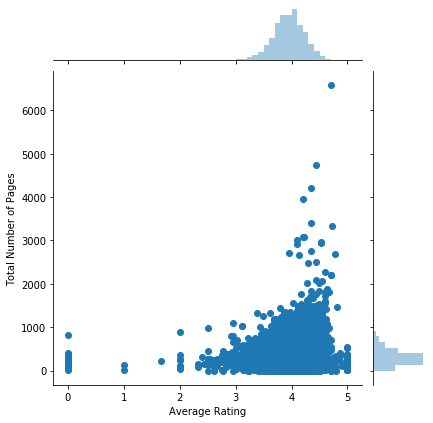

In [11]:
# Comparison of average ratings to number of pages
joint_plot(df.average_rating, df['# num_pages'], "Average Rating", "Total Number of Pages")
sns.set_context('paper')
plt.show()

The graph above gives the impression that perhaps longer books have better ratings. However, this may because they have few votes, since longer novels are perhaps read less often than shorter ones. Next we will take a look at the total number of rating counts compared to the number of pages.

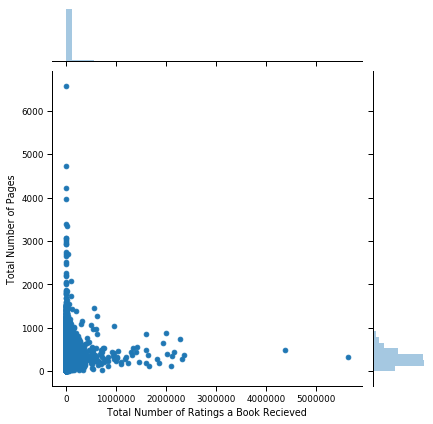

In [12]:
# Rating counts compared to number of pages
joint_plot(df.ratings_count, df['# num_pages'],"Total Number of Ratings a Book Recieved","Total Number of Pages")
sns.set_context('paper')
plt.show()

It does appear that longer books get far fewer ratings than shorter books. The majority of the ratings were seemingly given to books that were less than 1000 pages. This is likely due to the fact that books with more than 1000 pages may be anthology series that are condensened into single books.

## 5. The Average Rating Compared to Total Ratings Given

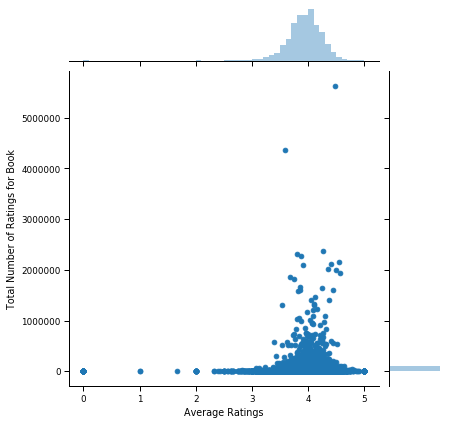

In [13]:
# Comparison of total number of ratings to average rating
joint_plot(df.average_rating, df.ratings_count, 'Average Ratings', 'Total Number of Ratings for Book')
sns.set_context('paper')
plt.show()

In [14]:
# Observing below 2000000 in order to get better understanding without outliers
below_2mil = df[df.ratings_count<2000000]

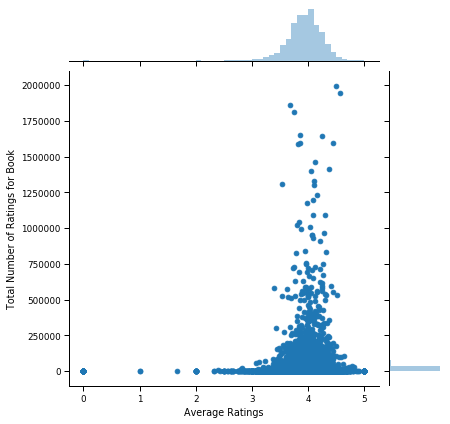

In [15]:
# Plotting below 2 million
joint_plot(below_2mil.average_rating, below_2mil.ratings_count, 'Average Ratings', 'Total Number of Ratings for Book')
sns.set_context('paper')
plt.show()

It does seem that around the average rating of 3.5 there is a large clump books that have more ratings on them, which makes sense since more ratings means the book is more widely read and therefore might have more people rating it.

## 6. Average Ratings to Total Text Reviews

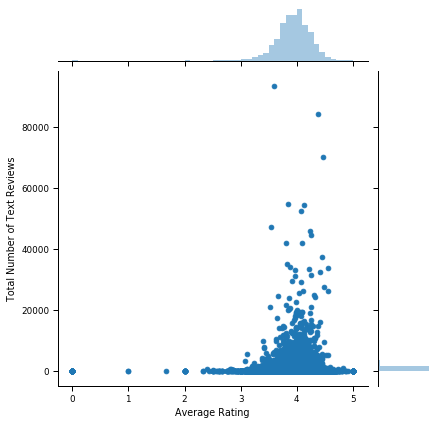

In [16]:
# Comparison of Average Ratings and Text Review count
joint_plot(df.average_rating, df.text_reviews_count, "Average Rating", "Total Number of Text Reviews")
sns.set_context("paper")
plt.show()

This layout follows a similiar pattern as the one above. The two comparisons seems to be correlated with one another since it is more likely that if someone is to rate a book, they would write a review for it.
<br>Following the understanding that more popular books get more ratings and more text reviews, it would also be good to see which books have the most ratings and text reviews.

## 7. Review counts compared to Text Reviews

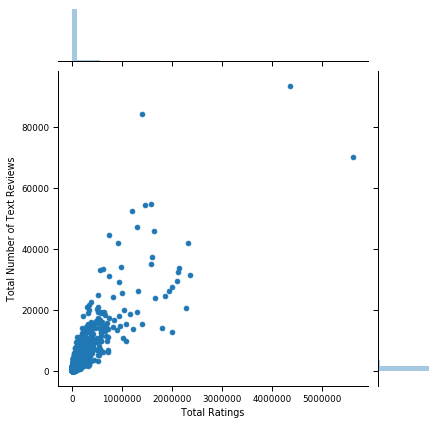

In [17]:
# Comparison of Average Ratings and Text Review count
joint_plot(df.ratings_count, df.text_reviews_count, "Total Ratings", "Total Number of Text Reviews")
sns.set_context("paper")
plt.show()

Above we can see a very clear correlation between total number of text reviews and total ratings for a book.

## 8. Books with the Most Text Reviews

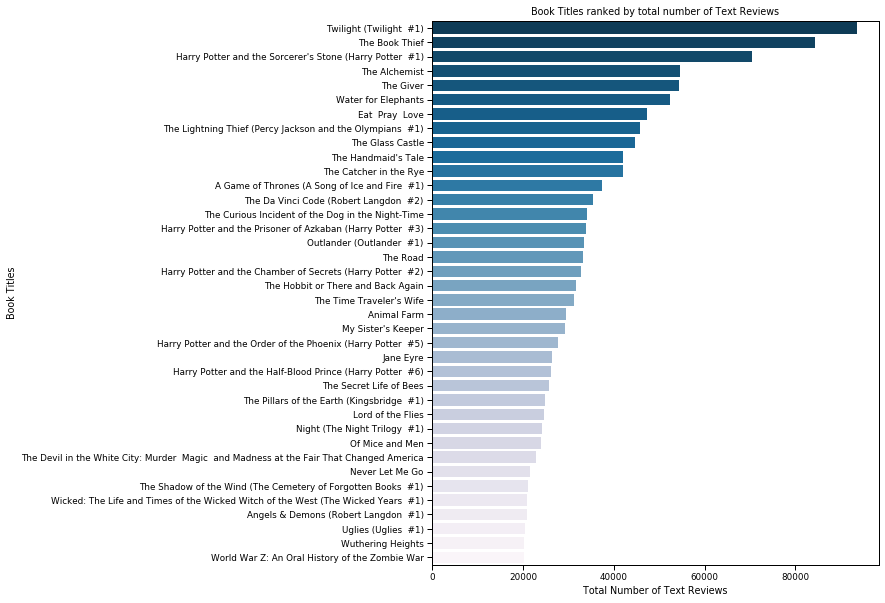

In [18]:
titles = list(df.loc[:,'title'])
reviews = list(df.loc[:,'text_reviews_count'])
titles_reviews = [(titles[i], reviews[i]) for i in range(0, len(reviews))]
sorted_titles_reviews = sorted(titles_reviews, key = lambda item: item[1], reverse = True)

# get x and y above 20000
x_tr_horizontal = list(item[1] for item in sorted_titles_reviews if item[1]>20000) 
y_tr_horizontal = list(item[0] for item in sorted_titles_reviews if item[1]>20000)

# Barplot of titles and text_reviews
plt.subplots(figsize=(8,10))
sns.barplot(x_tr_horizontal, y_tr_horizontal, palette='PuBu_r')
plt.xlabel('Total Number of Text Reviews')
plt.ylabel('Book Titles')
plt.title('Book Titles ranked by total number of Text Reviews')
plt.show()